# First Name Kantapong
# Last Name: Wongsanguan

# Import Libraries  

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy

# Import Data

In [45]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)
bottle = pd.read_csv('bottle.csv', low_memory=False)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.65,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.66,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.44,NaN,25.65,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,NaN,25.64,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.42,NaN,25.64,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data management 

In [46]:
bottle["T_degC"] = pd.to_numeric(bottle["T_degC"], errors="coerce")
bottle["O2Sat"] = pd.to_numeric(bottle["O2Sat"], errors="coerce")

C:\Users\kanta\AppData\Local\Temp\ipykernel_29120\1301626854.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sub1["T_degC"].dropna(), kde=False);


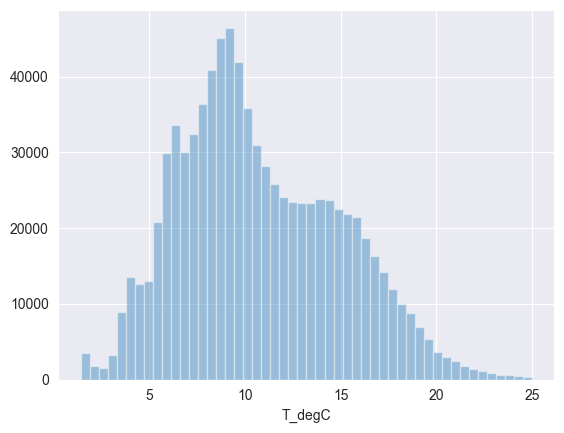

In [47]:
# Obtain subset of temperature up to 25 degrees.
# This limiting is also to cut off outliers.
sub1 = bottle[(bottle["T_degC"] > 0) & (bottle["T_degC"] < 25)].copy()
sns.distplot(sub1["T_degC"].dropna(), kde=False);

C:\Users\kanta\AppData\Local\Temp\ipykernel_29120\1583522103.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sub2["O2Sat"].dropna(), kde=False);


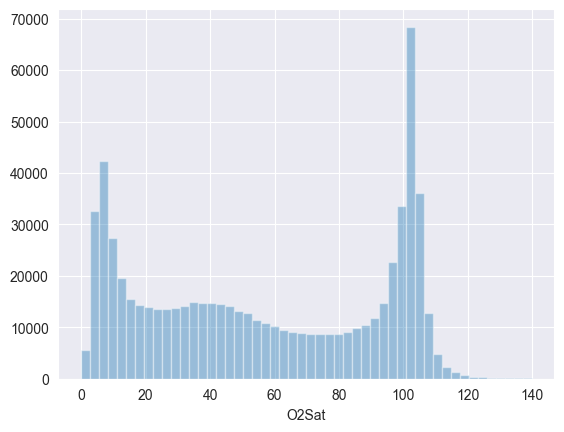

In [48]:
# Obtain subset of oxygen saturation up to 140%.
# This value was chosen because it is the maximum
# value for which a significant number of records exist, readings above this are considered outliers.
sub2 = sub1[(sub1["O2Sat"] < 140)].copy()
sns.distplot(sub2["O2Sat"].dropna(), kde=False);

In [49]:
# Obtain another subset containing only the required variables and with no null values.
sub3 = sub2[["T_degC", "O2Sat",]].dropna()

# Correlation between variables

In [50]:
# There is a strong positive correlation between temperature and oxygen saturation.
print("Association between temperature and oxygen saturation.")
print(scipy.stats.pearsonr(sub3["T_degC"], sub3["O2Sat"]))

Association between temperature and oxygen saturation.
PearsonRResult(statistic=0.8565216058262785, pvalue=0.0)


# Scatter Plot

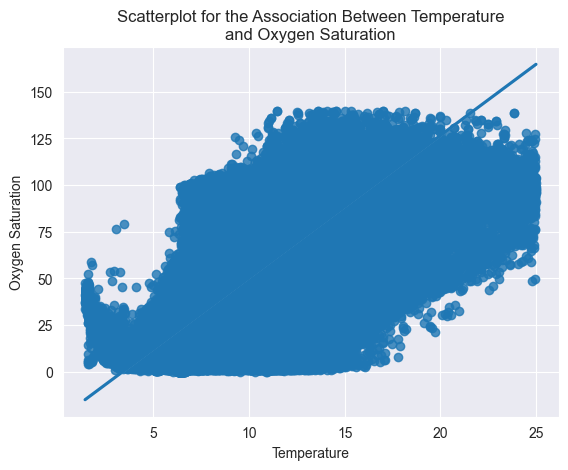

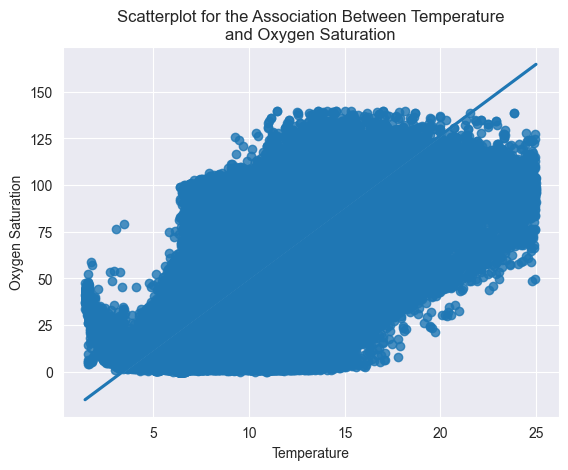

In [51]:
# Scatter plot of correlation between temperature (x) and oxygen saturation (y).
plt.figure()
scat = sns.regplot(x="T_degC", y="O2Sat", fit_reg=True, order=1, data=sub3)
plt.xlabel("Temperature")
plt.ylabel("Oxygen Saturation")
plt.title("Scatterplot for the Association Between Temperature\nand Oxygen Saturation");

In [52]:
# Center all variables by subtracting mean values.
sub3["T_degC_c"] = (sub3["T_degC"] - sub3["T_degC"].mean())
sub3["O2Sat_c"] = (sub3["O2Sat"] - sub3["O2Sat"].mean())


# Regression Analysis

In [53]:
# Perform regression analysis of how O2Sat_c is affected by T_degC_c.
reg1 = smf.ols("O2Sat_c ~ T_degC_c ", data=sub3).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                O2Sat_c   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 1.817e+06
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:19:02   Log-Likelihood:            -2.8827e+06
No. Observations:              659639   AIC:                         5.765e+06
Df Residuals:                  659637   BIC:                         5.765e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.143e-14      0.024   4.85e-13      1.0

In [54]:
# R-squared: 0.734
# p-value: 0.0
# equation: O2Sat_c = 1.143e-14 + 7.6335(T_degC_c)

# Residual plot

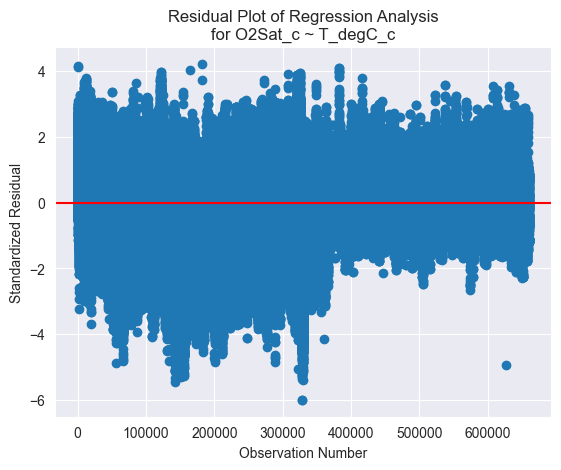

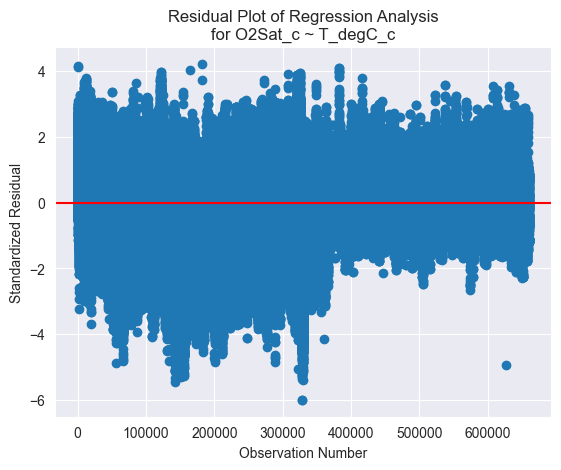

In [55]:
# Residual plot of regression analysis.
# The points appear to be evenly distributed above and below zero.
stdres = pd.DataFrame(reg1.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title("Residual Plot of Regression Analysis\nfor O2Sat_c ~ T_degC_c");

In [56]:
# Calculate percentage of residuals with more than 2 standard deviation.
# Value is < 5%, which is the maximum that can be considered a good fit.
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

5.0373007053858245
5.0373007053858245


In [57]:
# Calculate percentage of residuals with more than 2.5 standard deviation.
# Value is < 1%, which is the maximum that can be considered a good fit.
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

2.622343433302155
2.622343433302155
